In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
data = pd.read_csv('datasets/airline-passengers.csv', usecols=[1], engine='python')
dataset = data.values
dataset = dataset.astype('float32')
print(dataset[0:5])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]]


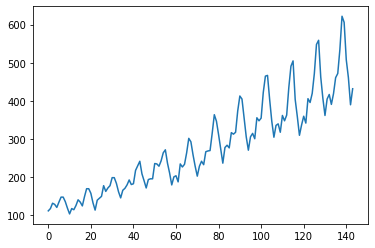

In [13]:
plt.plot(data)
plt.show()

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
print(trainX.shape, trainY.shape)

(94, 1, 1) (94,)


In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0485 - accuracy: 0.0106
Epoch 2/100
94/94 - 0s - loss: 0.0254 - accuracy: 0.0106
Epoch 3/100
94/94 - 0s - loss: 0.0176 - accuracy: 0.0106
Epoch 4/100
94/94 - 0s - loss: 0.0153 - accuracy: 0.0106
Epoch 5/100
94/94 - 0s - loss: 0.0144 - accuracy: 0.0106
Epoch 6/100
94/94 - 0s - loss: 0.0133 - accuracy: 0.0106
Epoch 7/100
94/94 - 0s - loss: 0.0121 - accuracy: 0.0106
Epoch 8/100
94/94 - 0s - loss: 0.0110 - accuracy: 0.0106
Epoch 9/100
94/94 - 0s - loss: 0.0099 - accuracy: 0.0106
Epoch 10/100
94/94 - 0s - loss: 0.0088 - accuracy: 0.0106
Epoch 11/100
94/94 - 0s - loss: 0.0079 - accuracy: 0.0106
Epoch 12/100
94/94 - 0s - loss: 0.0067 - accuracy: 0.0106
Epoch 13/100
94/94 - 0s - loss: 0.0058 - accuracy: 0.0106
Epoch 14/100
94/94 - 0s - loss: 0.0050 - accuracy: 0.0106
Epoch 15/100
94/94 - 0s - loss: 0.0042 - accuracy: 0.0106
Epoch 16/100
94/94 - 0s - loss: 0.0036 - accuracy: 0.0106
Epoch 17/100
94/94 - 0s - loss: 0.0031 - accuracy: 0.0106
Epoch 18/100
94/94 - 0s

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [26]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [28]:
import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.62 RMSE
Test Score: 46.65 RMSE


In [42]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[97:143, :] = testPredict

In [43]:
#print(len(trainPredict)+(look_back*2)+1,len(dataset)-1) # 97, 143
testPredictPlot[97: 143]

array([[319.26437],
       [305.76492],
       [358.15247],
       [350.65225],
       [357.21756],
       [418.0533 ],
       [454.97754],
       [456.6527 ],
       [402.08972],
       [349.7115 ],
       [309.63113],
       [339.31772],
       [343.10672],
       [322.14453],
       [363.7466 ],
       [350.65225],
       [364.67627],
       [429.3984 ],
       [476.46136],
       [487.767  ],
       [402.08972],
       [360.95297],
       [314.4538 ],
       [340.26596],
       [361.8849 ],
       [344.99722],
       [403.8779 ],
       [394.90173],
       [416.2942 ],
       [460.8242 ],
       [521.3634 ],
       [529.6902 ],
       [453.29855],
       [404.77063],
       [363.7466 ],
       [402.98425],
       [413.64847],
       [390.38086],
       [415.41318],
       [451.61584],
       [460.8242 ],
       [511.38364],
       [575.37646],
       [564.0884 ],
       [490.1659 ],
       [451.61584]], dtype=float32)

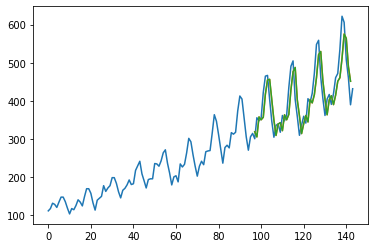

In [44]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.plot(testPredictPlot)
plt.show()